In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection, ensemble, linear_model, metrics
from sklearn.metrics import roc_auc_score,roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import f1_score

In [2]:
test_result_old = pd.read_parquet(r"test_result.parquet", engine='fastparquet')
train_result_old = pd.read_parquet(r"train_result.parquet", engine='fastparquet') 

In [3]:
test_result_old

,dataset,method,text,label,SimCSE,SimCSE_roberta,DiffCSE,DiffCSE_roberta
0,archiv,chief,\nThe isotony axiom is natural because we have...,0,0.500,0.470,0.595,0.710
1,archiv,chief,"\nIn the usual situation, all the von Neumann ...",0,0.280,0.375,0.770,0.360
2,archiv,chief,"\nAt the end of this section, we compare our f...",0,0.355,0.420,0.475,0.325
3,archiv,chief,\nBoth of one (unitary) vertex operator algebr...,0,0.595,0.475,0.670,0.685
4,archiv,chief,"\nFor nets of factors, we have introduced a ne...",0,0.485,0.590,0.590,0.390
...,...,...,...,...,...,...,...,...
257450,wikipedia,spin,"""Dead Man's Chest"" was discharged in the Unite...",1,0.745,0.695,0.825,0.950
257451,wikipedia,spin,The wedding of Will Turner and Elizabeth Swann...,1,0.460,0.560,0.485,0.730
257452,wikipedia,spin,Will discovers Jack and the group on an island...,1,0.395,0.560,0.445,0.545
257453,wikipedia,spin,"In Tortuga, Jack enlists another group, includ...",1,0.500,0.640,0.585,0.755


In [4]:
df = pd.read_csv("para_results_final.csv")
df = df.drop(['Unnamed: 0'],axis = 1)
df

,true,pred
0,0.0,0.499856
1,0.0,0.500049
2,0.0,0.499939
3,0.0,0.499820
4,0.0,0.500009
...,...,...
257450,1.0,0.731628
257451,1.0,0.731506
257452,1.0,0.731526
257453,1.0,0.731366


In [5]:
test_result_old = pd.merge(df, test_result_old, left_index = True, right_index = True)
test_result_old

,true,pred,dataset,method,text,label,SimCSE,SimCSE_roberta,DiffCSE,DiffCSE_roberta
0,0.0,0.499856,archiv,chief,\nThe isotony axiom is natural because we have...,0,0.500,0.470,0.595,0.710
1,0.0,0.500049,archiv,chief,"\nIn the usual situation, all the von Neumann ...",0,0.280,0.375,0.770,0.360
2,0.0,0.499939,archiv,chief,"\nAt the end of this section, we compare our f...",0,0.355,0.420,0.475,0.325
3,0.0,0.499820,archiv,chief,\nBoth of one (unitary) vertex operator algebr...,0,0.595,0.475,0.670,0.685
4,0.0,0.500009,archiv,chief,"\nFor nets of factors, we have introduced a ne...",0,0.485,0.590,0.590,0.390
...,...,...,...,...,...,...,...,...,...,...
257450,1.0,0.731628,wikipedia,spin,"""Dead Man's Chest"" was discharged in the Unite...",1,0.745,0.695,0.825,0.950
257451,1.0,0.731506,wikipedia,spin,The wedding of Will Turner and Elizabeth Swann...,1,0.460,0.560,0.485,0.730
257452,1.0,0.731526,wikipedia,spin,Will discovers Jack and the group on an island...,1,0.395,0.560,0.445,0.545
257453,1.0,0.731366,wikipedia,spin,"In Tortuga, Jack enlists another group, includ...",1,0.500,0.640,0.585,0.755


In [6]:
test_result_old = test_result_old[['dataset', 'method', 'text', 'label','pred']]
test_result_old

,dataset,method,text,label,pred
0,archiv,chief,\nThe isotony axiom is natural because we have...,0,0.499856
1,archiv,chief,"\nIn the usual situation, all the von Neumann ...",0,0.500049
2,archiv,chief,"\nAt the end of this section, we compare our f...",0,0.499939
3,archiv,chief,\nBoth of one (unitary) vertex operator algebr...,0,0.499820
4,archiv,chief,"\nFor nets of factors, we have introduced a ne...",0,0.500009
...,...,...,...,...,...
257450,wikipedia,spin,"""Dead Man's Chest"" was discharged in the Unite...",1,0.731628
257451,wikipedia,spin,The wedding of Will Turner and Elizabeth Swann...,1,0.731506
257452,wikipedia,spin,Will discovers Jack and the group on an island...,1,0.731526
257453,wikipedia,spin,"In Tortuga, Jack enlists another group, includ...",1,0.731366


In [7]:
test_result_old = test_result_old.rename(columns = {'pred':'final_model'})
test_result_old

,dataset,method,text,label,final_model
0,archiv,chief,\nThe isotony axiom is natural because we have...,0,0.499856
1,archiv,chief,"\nIn the usual situation, all the von Neumann ...",0,0.500049
2,archiv,chief,"\nAt the end of this section, we compare our f...",0,0.499939
3,archiv,chief,\nBoth of one (unitary) vertex operator algebr...,0,0.499820
4,archiv,chief,"\nFor nets of factors, we have introduced a ne...",0,0.500009
...,...,...,...,...,...
257450,wikipedia,spin,"""Dead Man's Chest"" was discharged in the Unite...",1,0.731628
257451,wikipedia,spin,The wedding of Will Turner and Elizabeth Swann...,1,0.731506
257452,wikipedia,spin,Will discovers Jack and the group on an island...,1,0.731526
257453,wikipedia,spin,"In Tortuga, Jack enlists another group, includ...",1,0.731366


In [8]:
dataset = test_result_old['dataset'].unique()
method = test_result_old['method'].unique()
all_couple = []
for dat in dataset:
    for met in method:
        all_couple+=[[dat,met]]

In [9]:
def confuns_matrix_double(train_rezalt_old,name):
    train_rezalt_old = train_rezalt_old.loc[(train_rezalt_old['dataset']==name[0])&
                                           (train_rezalt_old['method']==name[1])]
    for i in train_rezalt_old.columns[4:]:
        print(f'f1 for {i} for {name}')
        print(f1_score(train_rezalt_old['label'].tolist(), [int(p>0.51) for p in train_rezalt_old[i]], average='macro'))
        sns.heatmap(metrics.confusion_matrix(train_rezalt_old['label'],[int(p>0.51) for p in train_rezalt_old[i]]),annot=True,cmap="Blues",square=True)
        plt.ylabel("label")
        plt.xlabel(f"{i}")
        plt.title(f"Confusion matrix {i} for {name}")
        plt.show()

In [10]:
def roc_double(test_result_old,name):
    test_result_old = test_result_old.loc[(test_result_old['dataset']==name[0])&
                                           (test_result_old['method']==name[1])]    
    for i in test_result_old.columns[4:]:
        fpr, tpr, treshold = roc_curve(test_result_old['label'], test_result_old[i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr,
             label=f'ROC {i} for {name} (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Совмещенные ROC-кривые for {name}')
        plt.legend(loc="lower right")
    plt.show()

In [11]:
def roc_sep_doudle(test_result_old,name):
    test_result_old = test_result_old.loc[(test_result_old['dataset']==name[0])&
                                           (test_result_old['method']==name[1])]    
    for i in test_result_old.columns[4:]:
        fpr, tpr, treshold = roc_curve(test_result_old['label'], test_result_old[i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr,
             label=f'ROC {i} for {name} (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        if method is not None:
            plt.title(f'{i} for  = {name}')
        else:
            plt.title(f'{i}')
        plt.legend(loc="lower right")
        plt.show()

In [12]:
def confuns_matrix(train_rezalt_old,method = None,name = None):
    if method is not None:
        train_rezalt_old = train_rezalt_old.loc[train_rezalt_old[method]==name]
    for i in train_rezalt_old.columns[4:]:
        print(f'f1 for {i}')
        print(f1_score(train_rezalt_old['label'].tolist(), [int(p>0.51) for p in train_rezalt_old[i]], average='macro'))
        sns.heatmap(metrics.confusion_matrix(train_rezalt_old['label'],[int(p>0.51) for p in train_rezalt_old[i]]),annot=True,cmap="Blues",square=True)
        plt.ylabel("label")
        plt.xlabel(f"{i}")
        if method is not None:
            plt.title(f"Confusion matrix {i} for {method} = {name}")
        else:
            plt.title(f"Confusion matrix {i}")
        plt.show()

In [13]:
def roc(test_result_old,method = None,name = None):
    if method is not None:
        test_result_old = test_result_old.loc[test_result_old[method]==name]    
    for i in test_result_old.columns[4:]:
        fpr, tpr, treshold = roc_curve(test_result_old['label'], test_result_old[i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr,
             label=f'ROC {i} (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        if method is not None:
            plt.title(f'Совмещенные ROC-кривые for {method} = {name}')
        else:
            plt.title('Совмещенные ROC-кривые')
        plt.legend(loc="lower right")
    plt.show()

In [14]:
def roc_sep(test_result_old,method = None,name = None):
    if method is not None:
        test_result_old = test_result_old.loc[test_result_old[method]==name]
    for i in test_result_old.columns[4:]:
        fpr, tpr, treshold = roc_curve(test_result_old['label'], test_result_old[i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr,
             label=f'ROC {i} (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        if method is not None:
            plt.title(f'{i} for {method} = {name}')
        else:
            plt.title(f'{i}')
        plt.legend(loc="lower right")
        plt.show()

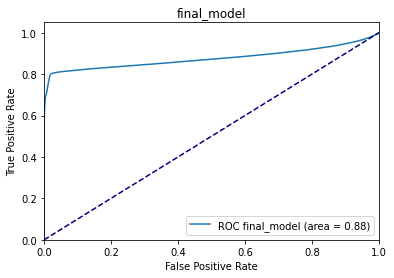

In [15]:
roc_sep(test_result_old)

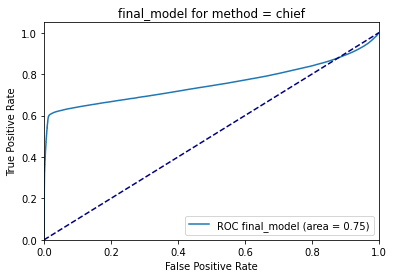

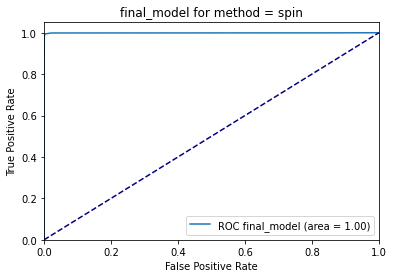

In [16]:
for method in test_result_old['method'].unique():
    roc_sep(test_result_old,'method',method)

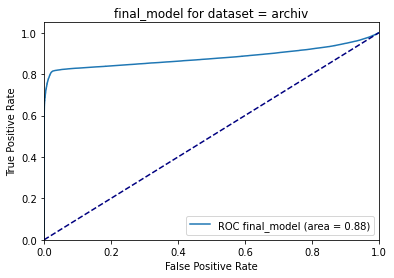

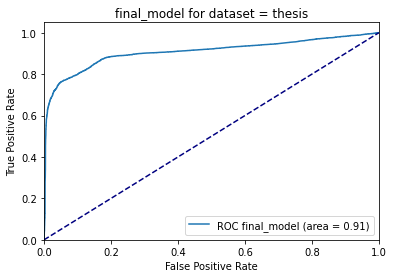

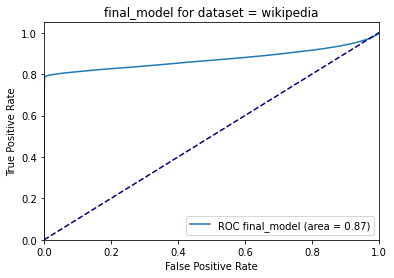

In [17]:
for dataset in test_result_old['dataset'].unique():
    roc_sep(test_result_old,'dataset',dataset)

f1 for final_model
0.8600079354566522


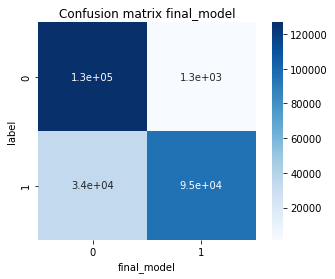

In [18]:
confuns_matrix(test_result_old)

f1 for final_model
0.7113042347333024


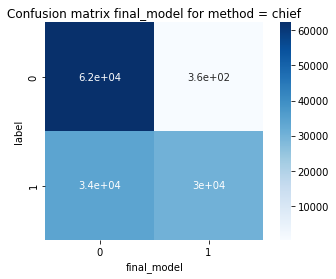

f1 for final_model
0.991118137897669


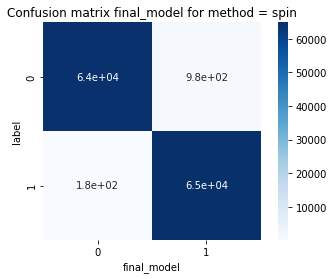

In [19]:
for method in test_result_old['method'].unique():
    confuns_matrix(test_result_old,'method',method)

f1 for final_model
0.8668309356673753


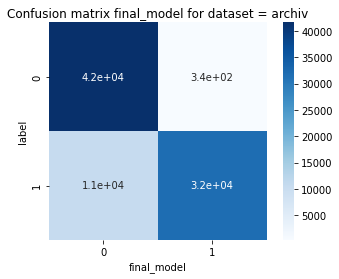

f1 for final_model
0.849053868392579


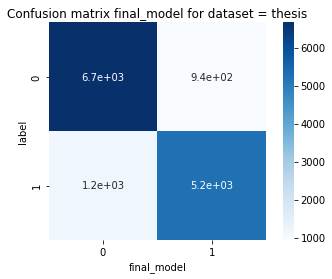

f1 for final_model
0.8573271975224109


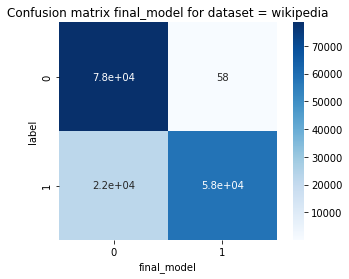

In [20]:
for dataset in test_result_old['dataset'].unique():
    confuns_matrix(test_result_old,'dataset',dataset)

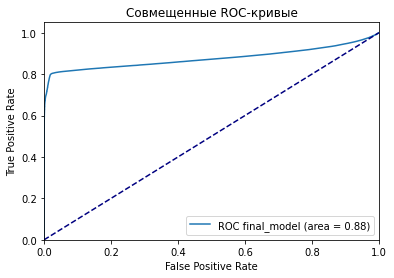

In [21]:
roc(test_result_old)

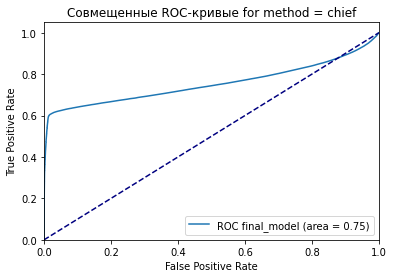

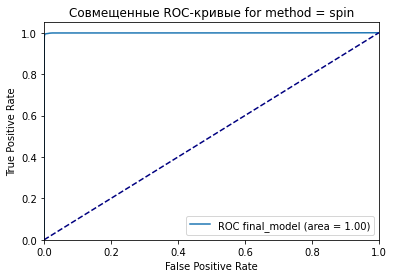

In [22]:
for method in test_result_old['method'].unique():
    roc(test_result_old,'method',method)

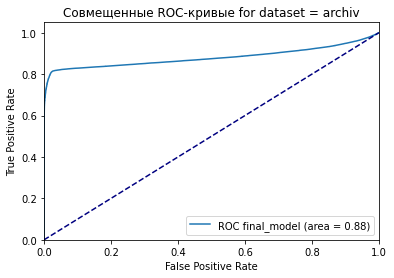

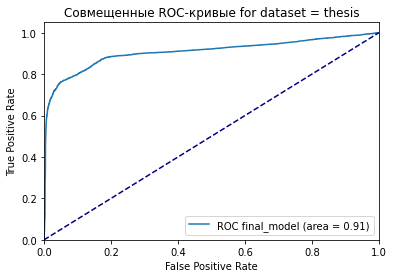

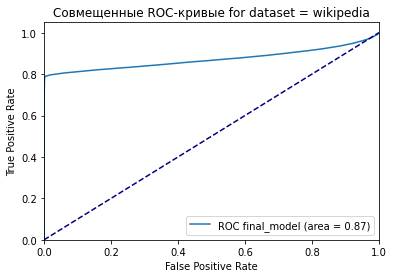

In [23]:
for dataset in test_result_old['dataset'].unique():
    roc(test_result_old,'dataset',dataset)